In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import pickle 
import numpy as np

In [2]:
df=pd.read_csv("ai4i2020.csv")

In [3]:
df[df["Machine failure"]==1]

UDI Product ID Type  Air temperature [K]  Process temperature [K]  \
50      51     L47230    L                298.9                    309.1   
69      70     L47249    L                298.9                    309.0   
77      78     L47257    L                298.8                    308.9   
160    161     L47340    L                298.4                    308.2   
161    162     L47341    L                298.3                    308.1   
...    ...        ...  ...                  ...                      ...   
9758  9759     L56938    L                298.6                    309.8   
9764  9765     L56944    L                298.5                    309.5   
9822  9823     L57002    L                298.5                    309.4   
9830  9831     L57010    L                298.3                    309.3   
9974  9975     L57154    L                298.6                    308.2   

      Rotational speed [rpm]  Torque [Nm]  Tool wear [min]  Machine failure  \
50                      2861          4.6              143                1   
69                      1410         65.7              191                1   
77                      1455         41.3              208                1   
160                     1282         60.7              216                1   
161                     1412         52.3              218                1   
...                      ...          ...              ...              ...   
9758                    2271         16.2              218                1   
9764                    1294         66.7               12                1   
9822                    1360         60.9              187                1   
9830                    1337         56.1              206                1   
9974                    1361         68.2              172                1   

      TWF  HDF  PWF  OSF  RNF  
50      0    0    1    0    0  
69      0    0    1    1    0  
77      1    0    0    0    0  
160     0    0    0    1    0  
161     0    0    0    1    0  
...   ...  ...  ...  ...  ...  
9758    1    0    0    0    0  
9764    0    0    1    0    0  
9822    0    0    0    1    0  
9830    0    0    0    1    0  
9974    0    0    1    1    0  

[339 rows x 14 columns]

In [4]:
df.info

<bound method DataFrame.info of         UDI Product ID Type  Air temperature [K]  Process temperature [K]  \
0         1     M14860    M                298.1                    308.6   
1         2     L47181    L                298.2                    308.7   
2         3     L47182    L                298.1                    308.5   
3         4     L47183    L                298.2                    308.6   
4         5     L47184    L                298.2                    308.7   
...     ...        ...  ...                  ...                      ...   
9995   9996     M24855    M                298.8                    308.4   
9996   9997     H39410    H                298.9                    308.4   
9997   9998     M24857    M                299.0                    308.6   
9998   9999     H39412    H                299.0                    308.7   
9999  10000     M24859    M                299.0                    308.7   

      Rotational speed [rpm]  Torque [Nm]  

In [5]:
from ydata_profiling import ProfileReport
ProfileReport(df)

Summarize dataset:   0%|          | 0/5 [00:00<?, ?it/s]

Generate report structure:   0%|          | 0/1 [00:00<?, ?it/s]

Render HTML:   0%|          | 0/1 [00:00<?, ?it/s]

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 14 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   UDI                      10000 non-null  int64  
 1   Product ID               10000 non-null  object 
 2   Type                     10000 non-null  object 
 3   Air temperature [K]      10000 non-null  float64
 4   Process temperature [K]  10000 non-null  float64
 5   Rotational speed [rpm]   10000 non-null  int64  
 6   Torque [Nm]              10000 non-null  float64
 7   Tool wear [min]          10000 non-null  int64  
 8   Machine failure          10000 non-null  int64  
 9   TWF                      10000 non-null  int64  
 10  HDF                      10000 non-null  int64  
 11  PWF                      10000 non-null  int64  
 12  OSF                      10000 non-null  int64  
 13  RNF                      10000 non-null  int64  
dtypes: float64(3), int64(9)

In [7]:
df.isnull().sum()

UDI                        0
Product ID                 0
Type                       0
Air temperature [K]        0
Process temperature [K]    0
Rotational speed [rpm]     0
Torque [Nm]                0
Tool wear [min]            0
Machine failure            0
TWF                        0
HDF                        0
PWF                        0
OSF                        0
RNF                        0
dtype: int64

In [8]:
import matplotlib.pyplot as plt
%matplotlib inline


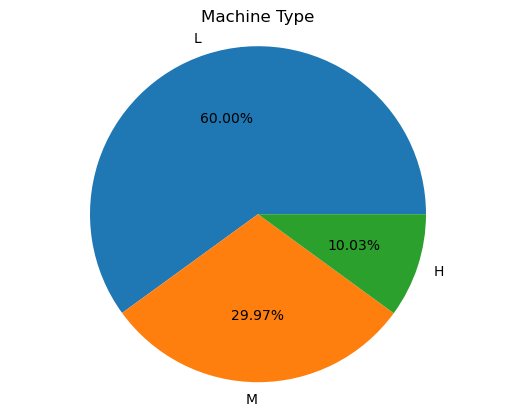

In [9]:
type_machine = df['Type'].value_counts()
labels = type_machine.index
sizes = type_machine.values
plt.pie(sizes, labels=labels, autopct='%1.2f%%')
plt.title('Machine Type')
plt.axis('equal')
plt.show()

In [10]:
x= df[['Air temperature [K]',
         'Process temperature [K]',
         'Rotational speed [rpm]',
         'Torque [Nm]',
         'Tool wear [min]',
          'TWF',
          'HDF',
        'PWF',
       'OSF','RNF'
        ]]

In [11]:
y=df[["Machine failure"]]

In [12]:
from sklearn.linear_model import LinearRegression

In [13]:
from sklearn import model_selection
x_train,x_test,y_train,y_test=model_selection.train_test_split(x,y,random_state=3)

In [14]:
model=LinearRegression()

In [15]:
model.fit(x_train,y_train)

LinearRegression()

In [16]:

for i,col in enumerate(x):
    print(col," m:",model.coef_[0][i]," c:",model.intercept_)

Air temperature [K]  m: -0.0003654995473332003  c: [-0.14929225]
Process temperature [K]  m: 0.0005880613519112332  c: [-0.14929225]
Rotational speed [rpm]  m: 3.636016412869052e-05  c: [-0.14929225]
Torque [Nm]  m: 0.0005652772532893309  c: [-0.14929225]
Tool wear [min]  m: 8.504191483467375e-06  c: [-0.14929225]
TWF  m: 0.9009533339230058  c: [-0.14929225]
HDF  m: 0.9596391099955338  c: [-0.14929225]
PWF  m: 0.8301702335585831  c: [-0.14929225]
OSF  m: 0.7997163346493912  c: [-0.14929225]
RNF  m: 0.0030454410837213947  c: [-0.14929225]


In [17]:
y_pred=model.predict(x_test)

In [19]:
model.score(x_test,y_test)

0.9060274173149908

In [20]:
y_test.shape,y_train.shape

((2500, 1), (7500, 1))